### Linear regression

Imports

In [2]:
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sb
from sklearn import tree as sktree
from sklearn import linear_model

In [3]:
X_train = pd.read_csv("sets/X_train.csv")
X_test = pd.read_csv("sets/X_test.csv")
y_train = pd.read_csv("sets/y_train.csv")
y_test = pd.read_csv("sets/y_test.csv")

X_train_oversampled = pd.read_csv("sets/X_train_oversampled.csv")
X_test_oversampled = pd.read_csv("sets/X_test_oversampled.csv")
y_train_oversampled = pd.read_csv("sets/y_train_oversampled.csv")
y_test_oversampled = pd.read_csv("sets/y_test_oversampled.csv")

Linear regression is a simple ML model. We want to try to find the best hyperplane to fit the features in our data

In [4]:
linearReg = linear_model.LinearRegression()
linearReg.fit(X_train, y_train)
y_pred = linearReg.predict(X_test)
y_pred_train = linearReg.predict(X_train)

In [5]:
print(f"RMSE: {metrics.mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {metrics.r2_score(y_test, y_pred)}")

print(f"RMSE for training: {metrics.mean_squared_error(y_train, y_pred_train, squared=False)}")
print(f"R2 for training: {metrics.r2_score(y_train, y_pred_train)}")

RMSE: 17.576401982187775
R2: 0.11673124577701632
RMSE for training: 17.63385760319117
R2 for training: 0.11894157747048673


We can see that the model perform similar in both train and test set, because linear regression can't overfit data.

Text(0, 0.5, 'number of assessments')

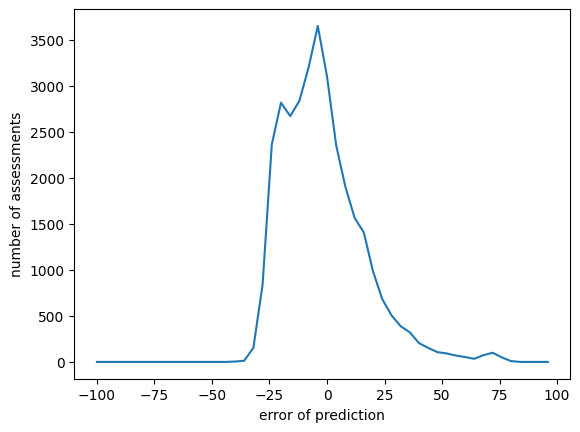

In [6]:
intervals=50
sliceInterval= 200/intervals
quantities=np.zeros(intervals)
values=np.zeros(intervals)
y_diff=y_pred-y_test.values
for j in range(intervals):
    quantities[j]= np.logical_and(y_diff >(sliceInterval*j)-100,y_diff < (sliceInterval*(j+1))-100).sum()
    values[j]=(sliceInterval*j)-100

plt.plot(values,quantities)
plt.xlabel("error of prediction")
plt.ylabel("number of assessments")


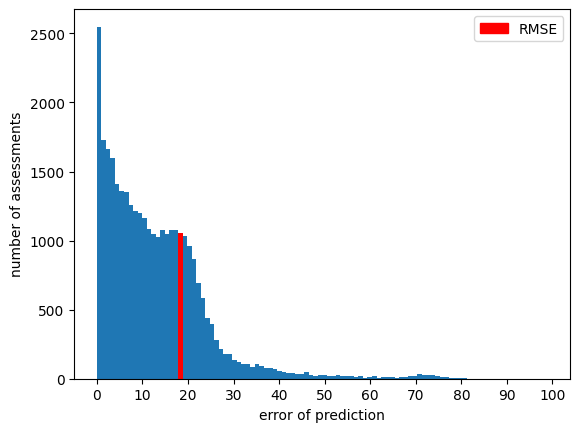

In [18]:
def plot2(y_t,y_p,rmse):
    y_p= y_p.round()
    y_t= y_t.round()
    y_diff= y_p-y_t.values
    y_diff= abs(y_diff)
    errori = np.zeros(100)

    errori[0] = np.logical_and(y_diff >= 0, y_diff <= 1).sum()
    for i in range(1,99):
        errori[i] = np.logical_and(y_diff > i, y_diff <= i+1).sum()

    x = [i for i in range(100)]
    plt.xticks([i*10 for i in range(11)])
    _, _, patches = plt.hist(x=x,weights=errori,bins =100)
    patches[rmse].set_facecolor('r')
    plt.xlabel("error of prediction")
    plt.ylabel("number of assessments")
    red_patch = mpatches.Patch(color='red', label='RMSE')
    plt.legend(handles=[red_patch]) 
    plt.show()

plot2(y_test,y_pred,18)

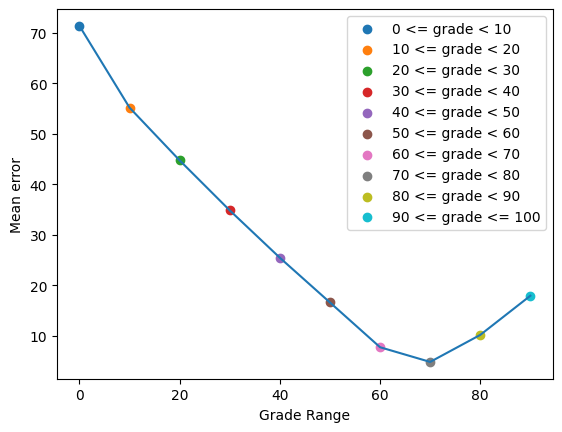

In [8]:
def plot1(y_t,y_p):
    n_classes = 10

    errors = abs(y_t.values - y_p)
    mean_diff = np.zeros(n_classes)
    mean_diff[0] = errors[np.logical_and(y_t >= 0, y_t <= (1/n_classes)*100)].mean()

    for i in range(1,n_classes):
        mean_diff[i] = errors[np.logical_and(y_t > (i/n_classes)*100, y_t <= ((i+1)/n_classes)*100)].mean()

    classes = [i*10 for i in range(n_classes)]

    j = 0
    for x in classes:
        plt.scatter(classes[j], mean_diff[j], label=f'{(j*10)} <= grade <{"=" if j == n_classes-1 else ""} {(j+1)*10}')
        j += 1

    plt.plot(classes, mean_diff)
    plt.xlabel("Grade Range")
    plt.ylabel("Mean error")
    plt.legend()
    plt.show()

plot1(y_test,y_pred)

Let's try with a Linear Regression trained on a new dataset obtained with oversampling from the original one.

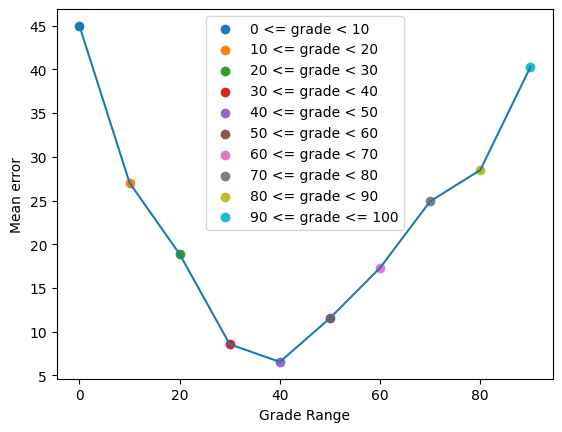

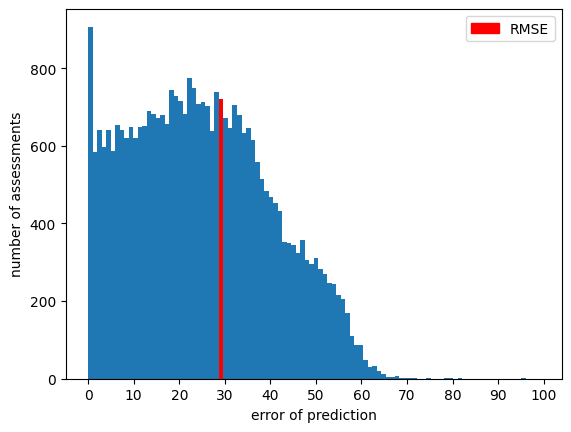

In [19]:
linearRegOS = linear_model.LinearRegression()
linearRegOS.fit(X_train_oversampled, y_train_oversampled)
y_pred_OS = linearRegOS.predict(X_test_oversampled)
y_pred_train_OS = linearRegOS.predict(X_train_oversampled)

plot1(y_test_oversampled,y_pred_OS)
plot2(y_test_oversampled,y_pred_OS,29)
